In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# TASK 1:  Pre-process the data and do data exploration

 ### a.) Use Pandas to load data 

In [2]:
df = pd.read_csv("winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### b.) Merge all the data with “quality” labels between 6-10 (inclusive) into Class 1 and similarly form Class 2 for the data with “quality” labels between 1-5 (inclusive).


In [4]:
np.unique(df['quality'])

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [5]:
classes = ['Class 1', 'Class 2']
df['classes'] = np.select((df['quality'] >= 6, df['quality'] <= 5), classes)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,classes
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Class 2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Class 2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Class 2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Class 1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Class 2


In [6]:
df['classes'].value_counts()

Class 1    855
Class 2    744
Name: classes, dtype: int64

### c.) Summarise the dataset by providing descriptive statistics and data visualisation plots, such as, scatter plots, boxplots, principal component analysis visualisation plots, and so on.

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


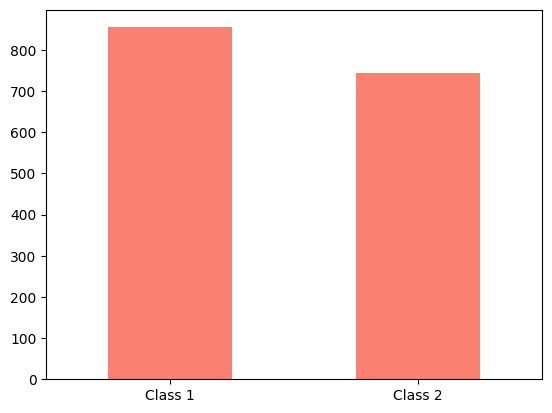

In [8]:
df['classes'].value_counts().plot(kind= 'bar',
                                  color="salmon")

plt.xticks(rotation=0);

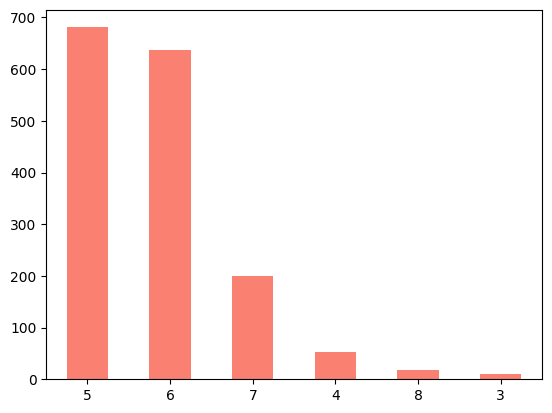

In [9]:
df['quality'].value_counts().plot(kind= 'bar',
                                  color="salmon")
plt.xticks(rotation=0);

In [10]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,classes
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Class 2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Class 2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Class 2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Class 1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Class 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Class 2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Class 1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Class 1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Class 2


In [11]:
df[df.columns[:len(df.columns) - 1]]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [12]:
norm = MinMaxScaler()

norm_data = norm.fit_transform(df[df.columns[:len(df.columns) - 1]])
norm_data = pd.DataFrame(norm_data, columns=df.columns[:len(df.columns) - 1])
norm_data['classes'] = df['classes']
norm_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,classes
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,Class 2
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,Class 2
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,Class 2
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,Class 1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,Class 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,0.4,Class 2
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,0.6,Class 1
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000,0.6,Class 1
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,0.4,Class 2


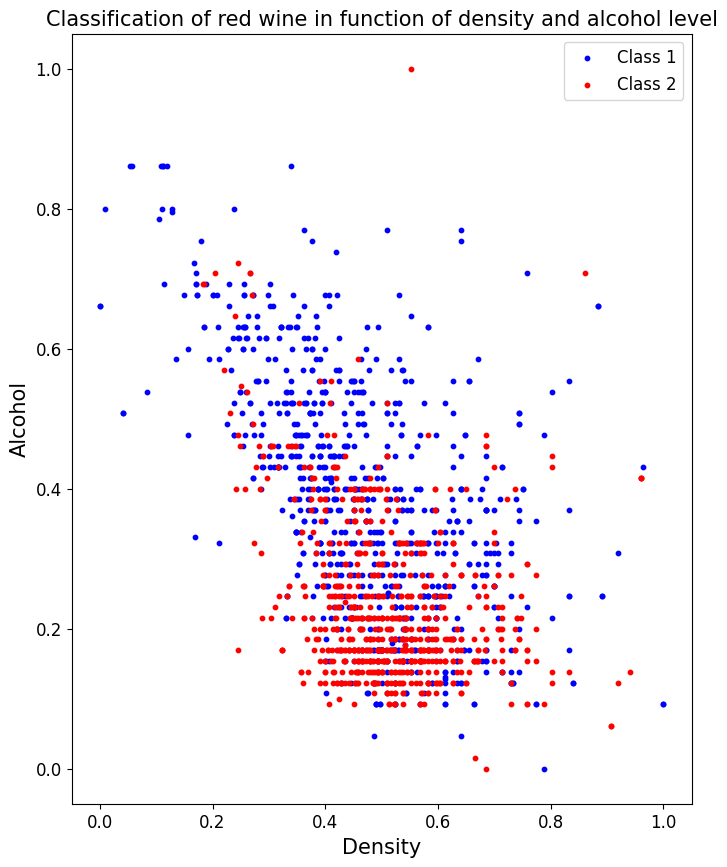

In [13]:
plt.figure(figsize=(8,10))
# plt.rcParams['axes.facecolor'] = 'grey'
plt.scatter(norm_data.density[norm_data.classes=='Class 1'],
            norm_data.alcohol[norm_data.classes=='Class 1'],
            c = 'blue',
            s = 10)

plt.scatter(norm_data.density[norm_data.classes=='Class 2'],
            norm_data.alcohol[norm_data.classes=='Class 2'],
            c ='red',
            s = 10)

plt.title('Classification of red wine in function of density and alcohol level', fontsize = 15)
plt.xlabel('Density', fontsize = 15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Alcohol', fontsize = 15)
plt.legend(['Class 1', 'Class 2'], fontsize = 12);
plt.savefig('alcohol_vs_density.png')
plt.show()

C:\Users\hansi\AppData\Local\Temp\ipykernel_23428\1028046915.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


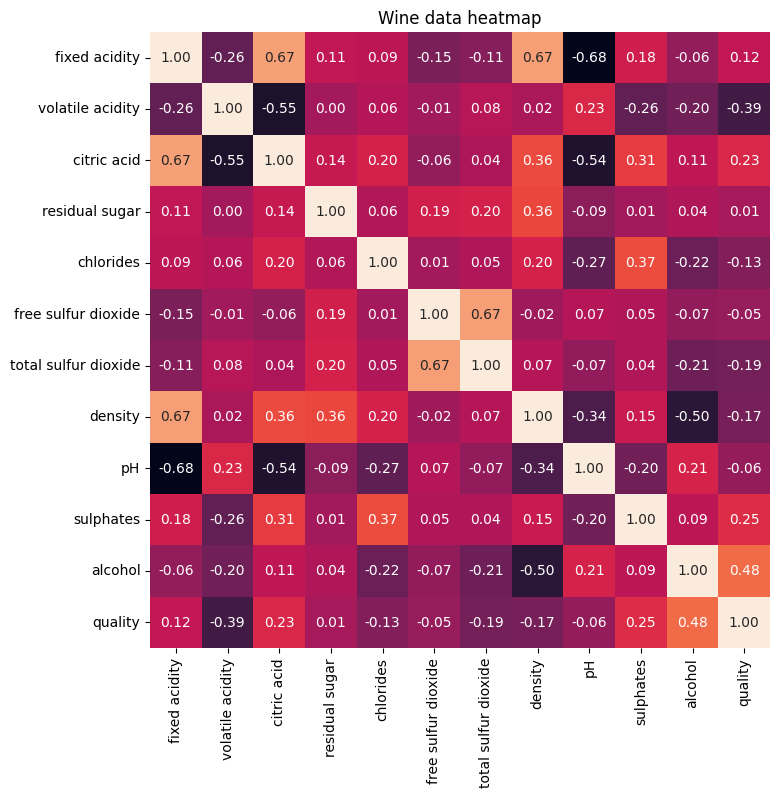

In [14]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(corr, annot=True, cbar=False, fmt=".2f").set(title="Wine data heatmap")

fig.savefig("heatmap.png")

In [15]:
X = df.drop('classes', axis=1)
y = df['classes']

In [16]:
std_features = StandardScaler().fit_transform(X)
std_features[0]

array([-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
       -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
       -0.96024611, -0.78782264])

In [17]:
pca = PCA(n_components=2)

In [18]:
principalComponents = pca.fit_transform(X)

In [19]:
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['pc1', 'pc2'])

In [20]:
principalDf

,pc1,pc2
0,-13.222027,-2.031922
1,22.040255,4.401791
2,7.165362,-2.508321
3,13.428369,-1.946032
4,-13.222027,-2.031922
...,...,...
1594,1.131806,16.304659
1595,9.488266,21.630751
1596,-3.432931,14.274277
1597,1.135574,16.307692


In [21]:
finalDf = pd.concat([principalDf, df[['classes']]], axis = 1)
finalDf

,pc1,pc2,classes
0,-13.222027,-2.031922,Class 2
1,22.040255,4.401791,Class 2
2,7.165362,-2.508321,Class 2
3,13.428369,-1.946032,Class 1
4,-13.222027,-2.031922,Class 2
...,...,...,...
1594,1.131806,16.304659,Class 2
1595,9.488266,21.630751,Class 1
1596,-3.432931,14.274277,Class 1
1597,1.135574,16.307692,Class 2


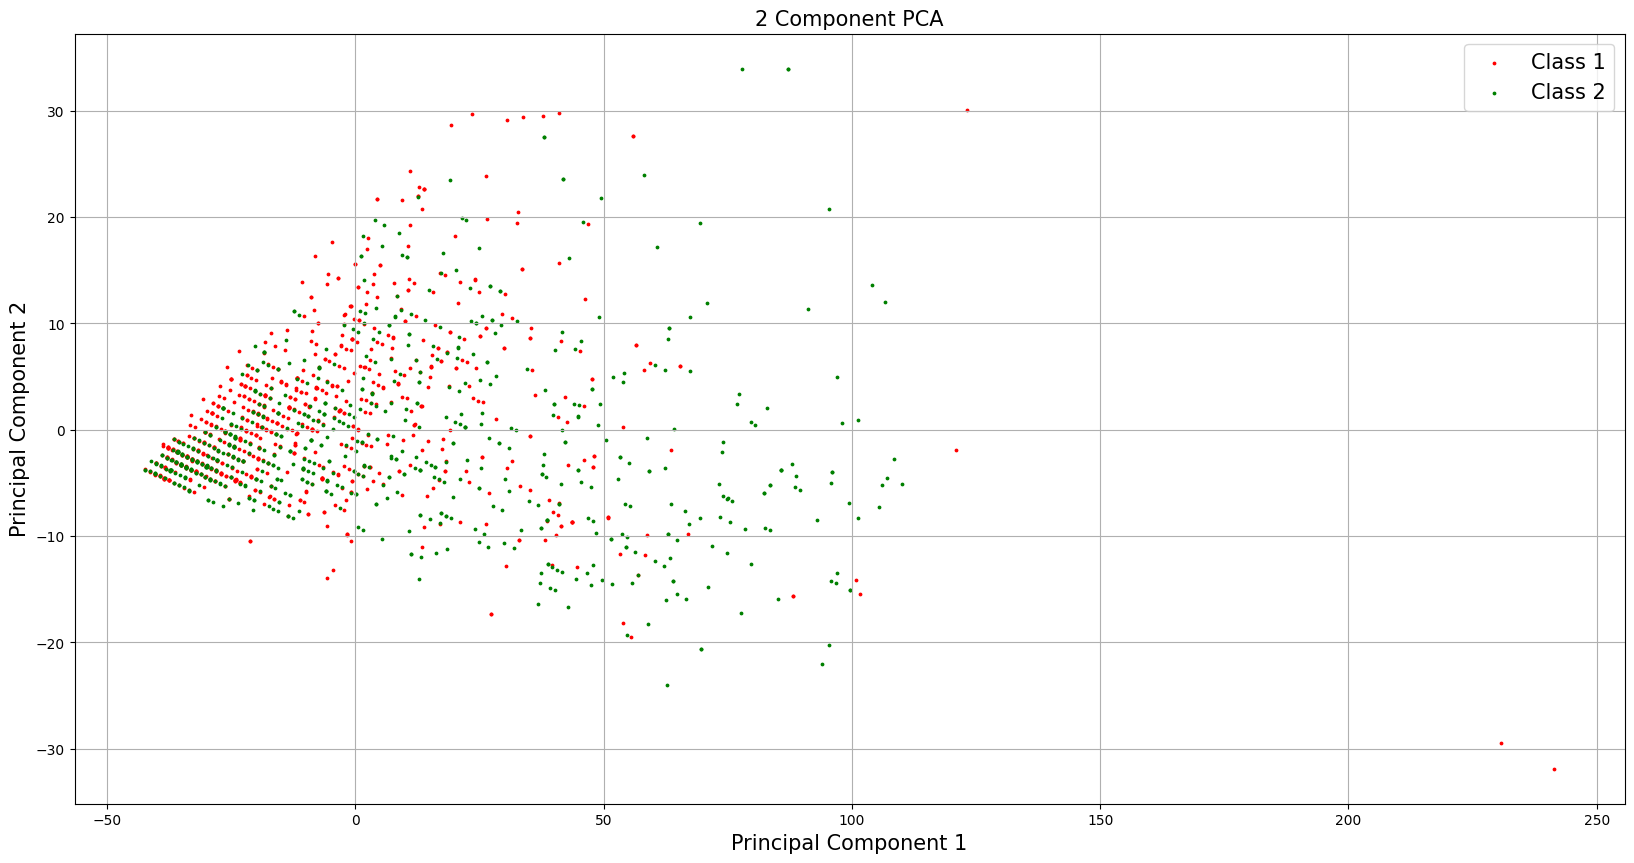

In [22]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot() 

targets = ['Class 1', 'Class 2']
colors = ['red', 'green']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['classes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1'],
               finalDf.loc[indicesToKeep, 'pc2'],
               c = color,
               s = 3)
    
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 15)
ax.legend(targets, fontsize = 15)
ax.grid();

In [23]:
pca.explained_variance_ratio_

array([0.94607951, 0.04834835])

**Task 1. Summary:-** Loaded the dataset "winequality-red.csv". Found that there are no null values in the dataset. Merged all the data with “quality” labels between 6-10 (inclusive) into Class 1 and similarly formed Class 2 for the data with “quality” labels between 1-5 (inclusive). Plotted bar graphs for the "classes" and "quality" features of the dataset. Created a scatter plot of "density" vs "alcohol" features of the dataset for the wine classified as Class 1 and Class 2. Generated a 2 component PCA projection and visualization.

# Task 2: 
### Divide the data set into a training set (I) and a test set. Usually, we use 20%-30% of the total data points as the test data. It is your choice on how to set the exact ratio. But you need make it clear in your report. You should further divide the training set (I) into a smaller training set (II)and a validation set using the same ratio. 

In [24]:
np.random.seed(23)

X_train1, X_test, y_train1, y_test = train_test_split(X,
                                                      y,
                                                      test_size=0.2)

In [25]:
np.random.seed(23)

X_train2, X_val, y_train2, y_val = train_test_split(X_train1,
                                                    y_train1,
                                                    test_size=0.2)

In [26]:
X_train1.shape, y_train1.shape

((1279, 12), (1279,))

In [27]:
X_train2.shape, y_train2.shape

((1023, 12), (1023,))

In [28]:
X_val.shape, y_val.shape

((256, 12), (256,))

In [29]:
X_test.shape, y_test.shape

((320, 12), (320,))

**Task 2. Summary:-** Divided the dataset into training set (I) and test set of 80% and 20% respectively. Further divided the training set (I) into training set (II) and validation set of 80% and 20% respectively.

# Task 3: 
### Do a classification using the logistic regression model 

### a.) Define your own function *([num1, num2] = misPatterns(predictions, labels))* using Python:  
### the inputs of this function are predictions and labels; and the outputs of this function are the number (num1) of misclassified patterns whose label is 1 but prediction is 2, and the number (num2) of misclassified patterns whose label is 2 but prediction is 1.

In [30]:
def misPatterns(predictions, labels):
    '''
    Inputs predictions and labels, and outputs the following;
    - 'num1' for misclassified patterns whose label is 1 but prediction is 2
    - 'num2' for misclassified patterns whose label is 2 but prediction is 1
    
    Parameters:
    predictions - Predicted labels
    labels - Actual labels  
      
    '''
    ctab = pd.crosstab(labels,
                       predictions,
                       rownames=['Actual labels'],
                       colnames=['Predicted labels'])
    num1 = ctab.loc['Class 1', 'Class 2']
    num2 = ctab.loc['Class 2', 'Class 1']
    
    return num1, num2

### b.) Train the model on the training set and report the performance on the test set including accuracy rate and results obtained using the misPatterns function you have defined in the previous task (Task 4 a.). 

In [31]:
model = LogisticRegression(n_jobs=-1,
                           random_state=23,
                           max_iter=50)
model.fit(X_train2, y_train2)

LogisticRegression(max_iter=50, n_jobs=-1, random_state=23)

In [32]:
y_preds = model.predict(X_test)
y_preds[:5]

array(['Class 1', 'Class 2', 'Class 2', 'Class 1', 'Class 1'],
      dtype=object)

In [33]:
misPatterns(y_preds, y_test)

(3, 0)

In [34]:
model.score(X_test, y_test)

0.990625

**Task 3. Summary:-** Created a function "misPatterns" that takes the predicted values and the actual labels as inputs and returns a tuple of misclassified patterns whose label is 1 but prediction is 2 as "num1", and misclassified patterns whose label is 2 but prediction is 1 as "num2". Trained the model "LogisticRegression" on the training set (II) and generated predictions on the test set. Used the the predicted labels and the actual labels to find misclassified patterns using the function "misPatterns".

# Task 4: 
### Investigate how the number of features in the training dataset affects the model performance on the validation set 

### a.) Use Training set II to train a number of D simple linear regression models, with D different feature sets. That is: the first one should use the 1st feature in the dataset only; the second one should use the 1st and the 2nd features in the dataset; the third one should use the 1st, 2nd, and 3rd features; the fourth one should use the first 4 features, and so on. 
* **Remember to scale the corresponding training set and the validation set.**


In [35]:
scaler = StandardScaler()
scaler.fit(X_train2)

StandardScaler()

In [36]:
scaled_X_train2 = scaler.transform(X_train2)
scaled_X_train2 = pd.DataFrame(scaled_X_train2)
scaled_X_train2.values[:,:2]

array([[-0.21622138, -1.19357973],
       [ 0.8144544 , -0.15558912],
       [ 2.6467669 , -0.31948237],
       ...,
       [ 2.76128643, -0.81116214],
       [-0.15896162,  1.0736103 ],
       [ 0.52815557, -0.75653105]])

In [37]:
y_train1_num = y_train1.replace(to_replace=['Class 1', 'Class 2'], value=[0, 1])
y_train2_num = y_train2.replace(to_replace=['Class 1', 'Class 2'], value=[0, 1])
y_test_num = y_test.replace(to_replace=['Class 1', 'Class 2'], value=[0, 1])
y_val_num = y_val.replace(to_replace=['Class 1', 'Class 2'], value=[0, 1])

In [38]:
col_len = len(X_train2.columns)

def separate_scores(X, y, column_length, dataset_type=None):
    """
    Trains the passed dataset by increasing 1 feature at a time, starting with 1 feature.
    """
    count = 0
    dataset_type = input("Type of set used(train, val, test) = ")
    for i in range(1, column_length+1):
        model.fit(X.iloc[:,:i], y)
        score = model.score(X.iloc[:,:i], y)
    
        if i > count:
            count+=1
    
        if i==1 and dataset_type == "train":
            print("Performance measurement on training set 2 of model trained with " + str(i) + " feature = " + str(score))
        elif dataset_type == "train":
            print("Performance measurement on training set 2 of model trained with " + str(i) + " features = " + str(score))
        elif i==1 and dataset_type == "val":
            print("Performance measurement on validation set of model trained with " + str(i) + " feature = " + str(score))
        else:
            print("Performance measurement on validation set of model trained with " + str(i) + " features = " + str(score))

    print(f"\nMost suitable number of features = {count}")

In [39]:
separate_scores(scaled_X_train2,
                y_train2_num,
                column_length=col_len)

# Type of set used(train, val, test) = train

Performance measurement on training set 2 of model trained with 1 feature = 0.5171065493646139
Performance measurement on training set 2 of model trained with 2 features = 0.6608015640273704
Performance measurement on training set 2 of model trained with 3 features = 0.6656891495601173
Performance measurement on training set 2 of model trained with 4 features = 0.6656891495601173
Performance measurement on training set 2 of model trained with 5 features = 0.6656891495601173
Performance measurement on training set 2 of model trained with 6 features = 0.6666666666666666
Performance measurement on training set 2 of model trained with 7 features = 0.6979472140762464
Performance measurement on training set 2 of model trained with 8 features = 0.7204301075268817
Performance measurement on training set 2 of model trained with 9 features = 0.7321603128054741
Performance measurement on training set 2 of model trained with 10 features = 0.7458455522971652
Performance measurement on training set 

In [40]:
separate_scores(X_val,
                y_val_num,
                column_length=col_len)

# Type of set used(train, val, test) = val

Performance measurement on validation set of model trained with 1 feature = 0.5703125
Performance measurement on validation set of model trained with 2 features = 0.58203125
Performance measurement on validation set of model trained with 3 features = 0.58203125
Performance measurement on validation set of model trained with 4 features = 0.6015625
Performance measurement on validation set of model trained with 5 features = 0.61328125
Performance measurement on validation set of model trained with 6 features = 0.609375
Performance measurement on validation set of model trained with 7 features = 0.64453125
Performance measurement on validation set of model trained with 8 features = 0.64453125
Performance measurement on validation set of model trained with 9 features = 0.62109375
Performance measurement on validation set of model trained with 10 features = 0.63671875
Performance measurement on validation set of model trained with 11 features = 0.7265625
Performance measurement on validatio

### b.) Produce a learning curve of the number of features used against the performance measurements. The performance should be measured on both Training set II and the validation set.


In [41]:
def plot_learning_curve(estimator, X, y, set_type=None):
    """
    Produces a learning curve of the number of features used against the performance measurements.
    """
    set_type = input("Type of set used(train, val, test) = ")
    train_size, train_score, test_scores = learning_curve(estimator,
                                                          X,
                                                          y,
                                                          n_jobs=-1)
    train_mean = np.mean(train_score, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    
    plt.plot(train_size, train_mean, label="Training Score")
    plt.plot(train_size, test_mean, label="Validation Score")
    
    if set_type == "train":
        plt.title("Learning Curve for Training Set 2")
    elif set_type == "val":
        plt.title("Learning Curve for Validation Set")
        
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc = "best");

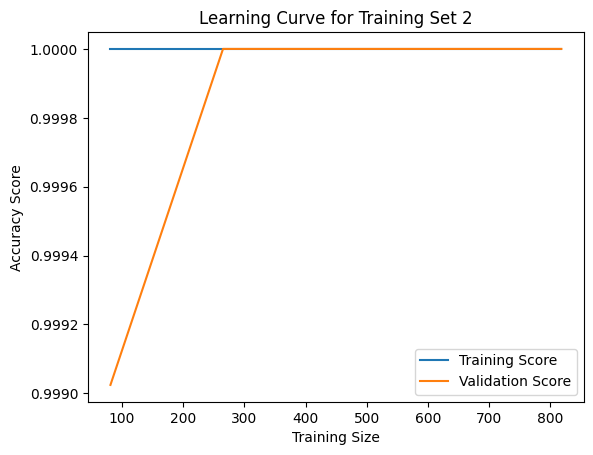

In [42]:
plot_learning_curve(model, scaled_X_train2, y_train2_num)

# Type of set used(train, val, test) = train

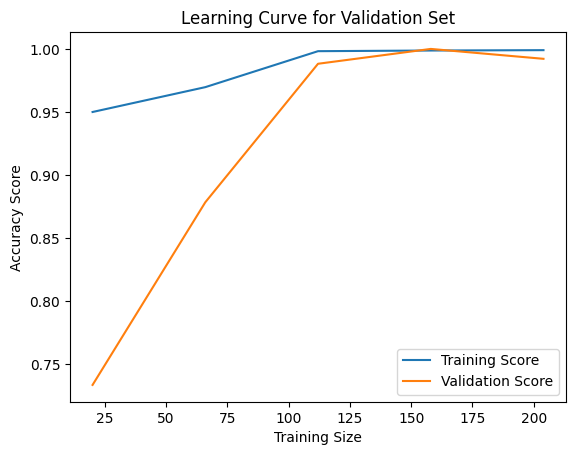

In [43]:
plot_learning_curve(model, X_val, y_val_num)

# Type of set used(train, val, test) = val

### c.) Use the most suitable number of features to train the model using Training_set_I and report the performance on the test set. 
* **Remember to scale the corresponding training and test sets**


In [44]:
X_train1.iloc[:, :12].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1446,6.9,0.63,0.02,1.9,0.078,18.0,30.0,0.99712,3.40,0.75,9.8,5
578,8.8,0.47,0.49,2.9,0.085,17.0,110.0,0.99820,3.29,0.60,9.8,5
21,7.6,0.39,0.31,2.3,0.082,23.0,71.0,0.99820,3.52,0.65,9.7,5
123,8.0,0.71,0.00,2.6,0.080,11.0,34.0,0.99760,3.44,0.53,9.5,5
620,8.3,0.54,0.24,3.4,0.076,16.0,112.0,0.99760,3.27,0.61,9.4,5


In [45]:
model.fit(X_train1, y_train1)

LogisticRegression(max_iter=50, n_jobs=-1, random_state=23)

In [46]:
model.score(X_test, y_test)

0.990625

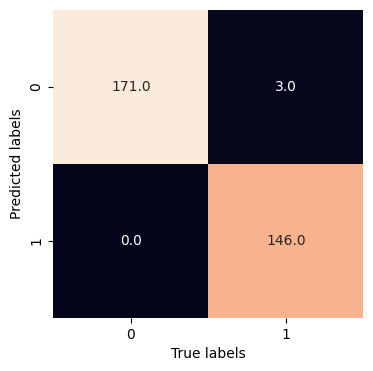

In [47]:
fig, ax = plt.subplots(figsize=(4, 4))
ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                 annot=True,
                 cbar=False,
                 fmt=".1f")
plt.xlabel('True labels')
plt.ylabel('Predicted labels');

# Same result as Task 4.(b)

In [48]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

     Class 1       1.00      0.98      0.99       174
     Class 2       0.98      1.00      0.99       146

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320



In [49]:
cv_acc = cross_val_score(model,
                         X_test,
                         y_test_num,
                         cv=5,
                         scoring='accuracy')
np.mean(cv_acc)

0.9875

In [50]:
cv_precision = cross_val_score(model,
                               X_test,
                               y_test_num,
                               cv=5,
                               scoring='precision')
np.mean(cv_precision)

0.9797701149425289

In [51]:
cv_recall = cross_val_score(model,
                               X_test,
                               y_test_num,
                               cv=5,
                               scoring='recall')
np.mean(cv_recall)

0.993103448275862

In [52]:
cv_f1 = cross_val_score(model,
                        X_test,
                        y_test_num,
                        cv=5,
                        scoring='f1')
np.mean(cv_f1)

0.986323787258913

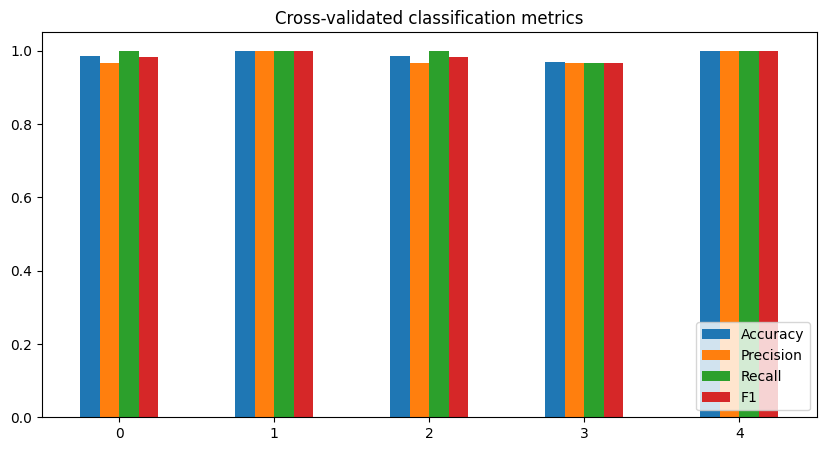

In [53]:
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_precision,
                           'Recall': cv_recall,
                           'F1':cv_f1})
cv_metrics.plot.bar(figsize = (10, 5), 
                    title='Cross-validated classification metrics');
plt.legend(loc="lower right")
plt.xticks(rotation=0);

**Task 4. Summary:-** Scaled the training set (II) and transformed the categorical data into numerical data. Created the function "separate_scores" that trains the model starting with 1 feature and then increasing 1 feature to train the model at a time. It returns the efficiency on each iteration and the most suitable number of features for training the model. Used this function to train and evaluate for training set (II) and the validation set. Created function "plot_learning_curve" to plot learning curves. Produced learning curves for training set (II) and validation set. In Task 4.(c) I used the most suitable number of features, i.e.; 12, to train the training set (I) and checked the score on the test set. Used the predictions generated in Task 3.(b) to produce and visualize confusion matrix. Generated classification report and visualized the cross validated classification metrics.